In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_raw = pd.read_csv("bank_customers.csv")
df_raw

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Очищаем датасет от ненужных колонок. Строковые значения кодируем как категориальные признаки.

In [ ]:
df = pd.get_dummies(df_raw, columns=["Geography", "Gender"]).drop(columns=["Surname", "RowNumber", "CustomerId"])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


Посмотрим на распределения величин:

<Axes: >

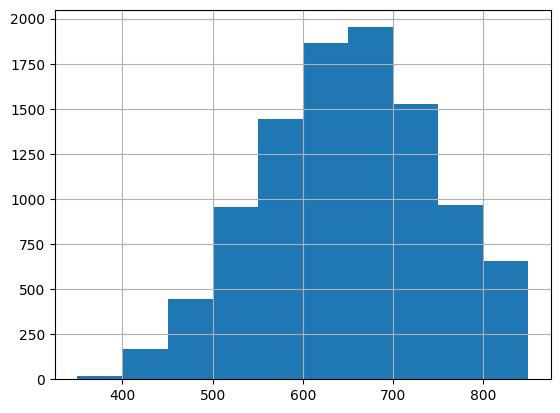

In [ ]:
df.CreditScore.hist()

Данное распределение близкое к нормальному. Можно предположить, что банк не несет высоких кредитных рисков.

<Axes: >

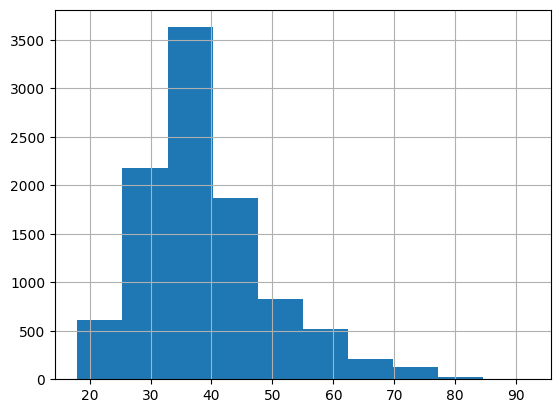

In [ ]:
df.Age.hist()

Распределение возрастов выглядит близким к $\chi^2$. Средний возраст 38-39 лет.

In [ ]:
df.Age.mean()

38.9218

<Axes: >

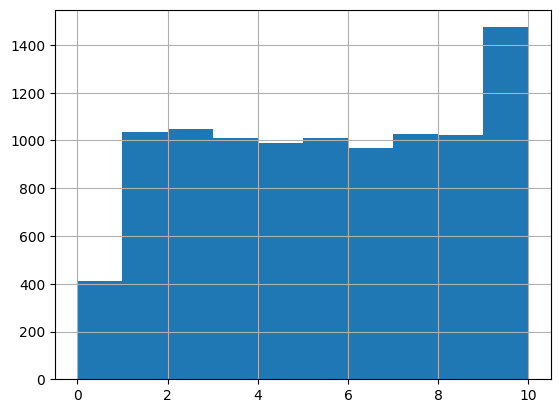

In [ ]:
df.Tenure.hist()

Распределение практически равномерное – за исключением первого и последнего столбца. С одной стороны, это говорит о том, что банк неплохо вкладывается в ретеншен (удержание) старых клиентов, однако достаточно слабо привлекает новых.

<Axes: >

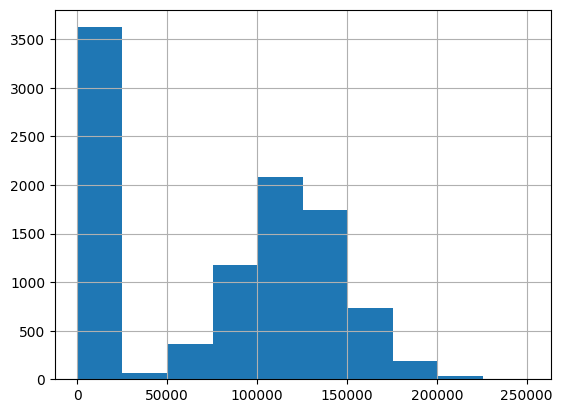

In [ ]:
df.Balance.hist()

В целом распределение близко к нормальному, если не считать клиентов с нулевым или околонулевым балансом.

<Axes: >

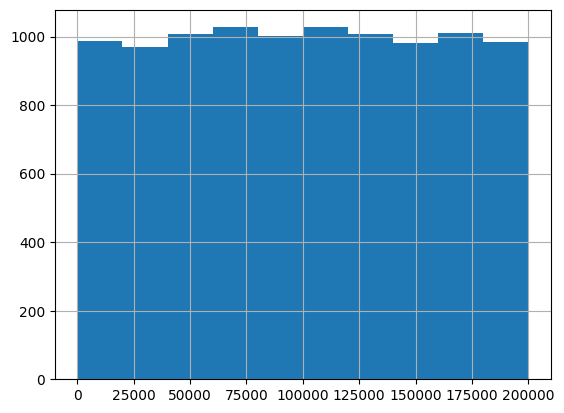

In [ ]:
df.EstimatedSalary.hist()

Здесь распределение равномерное. Скорее всего, банк плохо оценивает зарплаты своих клиентов, поэтому признак в таком виде кажется бесполезным.

<Axes: >

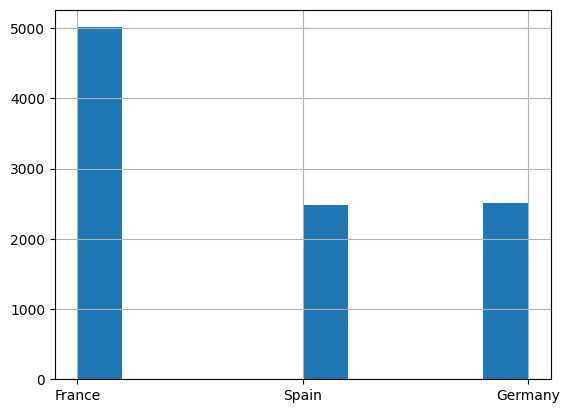

In [ ]:
df_raw.Geography.hist()

Около половины клиентов из Франции, примерно по 25% – из Испании и Германии.

Посмотрим, есть ли выбросы и уберем их

In [ ]:
from matplotlib.cbook import boxplot_stats

In [ ]:
for column in ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]:
    outliers = [y for stat in boxplot_stats(df[column]) for y in stat["fliers"]]
    print(column, len(outliers), "outliers")

    df = df[~df[column].isin(outliers)]

CreditScore 15 outliers
Age 359 outliers
Tenure 0 outliers
Balance 0 outliers
EstimatedSalary 0 outliers


Посмотрим на корреляционную матрицу.

In [ ]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.013055,-0.000798,0.007229,0.011554,-0.000914,0.020416,0.002609,-0.016413,-0.011523,0.006981,0.006335,0.004011,-0.004011
Age,-0.013055,1.000000,-0.010576,0.041412,-0.032473,-0.016363,0.017838,-0.005601,0.358494,-0.050941,0.062840,-0.004160,0.030700,-0.030700
Tenure,-0.000798,-0.010576,1.000000,-0.012925,0.015049,0.019781,-0.027236,0.010031,-0.012872,-0.002390,-0.000310,0.003082,-0.014560,0.014560
Balance,0.007229,0.041412,-0.012925,1.000000,-0.304347,-0.013795,-0.006958,0.010241,0.116913,-0.229714,0.401628,-0.137710,-0.010465,0.010465
NumOfProducts,0.011554,-0.032473,0.015049,-0.304347,1.000000,0.002714,0.011250,0.013560,-0.050669,0.000214,-0.010903,0.010719,0.021116,-0.021116
HasCrCard,-0.000914,-0.016363,0.019781,-0.013795,0.002714,1.000000,-0.012287,-0.010259,-0.008491,0.004936,0.010121,-0.015902,-0.006538,0.006538
IsActiveMember,0.020416,0.017838,-0.027236,-0.006958,0.011250,-0.012287,1.000000,-0.010309,-0.143424,-0.000019,-0.015828,0.015942,-0.021880,0.021880
EstimatedSalary,0.002609,-0.005601,0.010031,0.010241,0.013560,-0.010259,-0.010309,1.000000,0.009123,-0.000641,0.010442,-0.009761,0.007245,-0.007245
Exited,-0.016413,0.358494,-0.012872,0.116913,-0.050669,-0.008491,-0.143424,0.009123,1.000000,-0.103478,0.173279,-0.054349,0.106762,-0.106762
Geography_France,-0.011523,-0.050941,-0.002390,-0.229714,0.000214,0.004936,-0.000019,-0.000641,-0.103478,1.000000,-0.581237,-0.574501,-0.009139,0.009139


Коррелируют:
* Age и Exited: средне, положительно
* NumOfProducts и Balance: средне, отрицательно
* Geography и Balance: Франция и Испания средне отрицательно, Германия сильно положительно
* Exited и Balance: слабо, положительно
* IsActiveMember и Exited: слабо, отрицательно
* Gender и Exited: слабо положительно с женщинами, слабо отрицательно с мужчинами. Значит, женщины чаще закрывают счет, чем мужчины


In [ ]:
df.Gender_Male.sum(), df.Gender_Female.sum()

(5258, 4368)

Попробуем спрогнозировать признак Exited с помощью регрессии. Для этого возьмем коррелирующие с ним факторы: Age, Balance, Gender.

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from scipy.stats import f, t, gmean, chi2

In [ ]:
df_regr1 = df[["Exited", "Age", "Balance", "Gender_Male", "Gender_Female", "IsActiveMember"]]
df_regr1["Balance"] = np.log(df_regr1["Balance"] + 1)

<ipython-input-95-a4ef33dd8607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regr1["Balance"] = np.log(df_regr1["Balance"] + 1)


In [ ]:
regr = smf.ols("Exited ~ Age + Balance + Gender_Male + Gender_Female + IsActiveMember", data=df_regr1).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     493.8
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:11:31   Log-Likelihood:                -3984.0
No. Observations:                9626   AIC:                             7978.
Df Residuals:                    9621   BIC:                             8014.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2664      0.012    -23.031      0.000      -0.289      -0.244
Age                0.0161      0.000     37.976      0.000       0.015       0.017
Balance            0.0075      0.001     11.198      0.000       0.006       0.009
Gender_Male       -0.1707      0.007    -25.265      0.000      -0.184      -0.157
Gender_Female     -0.0957      0.007    -13.616      0.000      -0.109      -0.082
IsActiveMember    -0.1186      0.007    -15.886      0.000      -0.133      -0.104
==============================================================================
Omnibus:                     1428.112   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2159.953
Skew:                           1.152   Prob(JB):                         0.00
Kurtosis:                       3.280   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.58e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Все переменные значимо влияют на вероятность того, что клиент закроет счет на любом разумном уровне значимости.

На уровне значимости 1%:
* Увеличение возраста на 1 год увеличивает вероятность закрыть счет на 1%
* Увеличение баланса на 1% увеличивает вероятность закрыть счет на 0.7% (очень занимательно)
* Если клиент – мужчина, то вероятность закрытия счета снижается на ~7.5% при прочих равных
* Если клиент активный, то вероятность закрытия счета снижается на 11.9% при прочитах равных



$R^2$ низкий, поэтому регрессия плохо объясняет зависимую переменную. Возможно, мы не учли важные коррелирующие факторы.

Построим новую регрессию, добавив коррелирующие с Balance признаки

In [ ]:
df_regr2 = df[["Exited", "Age", "Balance", "Gender_Male", "Gender_Female", "IsActiveMember", "Geography_France", "Geography_Germany", "Geography_Spain"]]
df_regr2["Balance"] = np.log(df_regr1["Balance"] + 1)

<ipython-input-99-ba4c065b0106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regr2["Balance"] = np.log(df_regr1["Balance"] + 1)


In [ ]:
regr = smf.ols("Exited ~ Age + Balance + Gender_Male + Gender_Female + IsActiveMember + Geography_France + Geography_Germany + Geography_Spain", data=df_regr2).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     358.9
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:13:57   Log-Likelihood:                -3910.5
No. Observations:                9626   AIC:                             7835.
Df Residuals:                    9619   BIC:                             7885.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1925      0.010    -19.957      0.000      -0.211      -0.174
Age                   0.0159      0.000     37.655      0.000       0.015       0.017
Balance               0.0163      0.003      4.839      0.000       0.010       0.023
Gender_Male          -0.1324      0.006    -22.121      0.000      -0.144      -0.121
Gender_Female        -0.0601      0.006     -9.696      0.000      -0.072      -0.048
IsActiveMember       -0.1171      0.007    -15.795      0.000      -0.132      -0.103
Geography_France     -0.1027      0.006    -18.658      0.000      -0.113      -0.092
Geography_Germany     0.0130      0.008      1.687      0.092      -0.002       0.028
Geography_Spain      -0.1029      0.007    -15.483      0.000      -0.116      -0.090
==============================================================================
Omnibus:                     1403.115   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2103.436
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                       3.317   Cond. No.                     1.95e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.82e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Все кроме признака проживания в Германии статзначимо на любом разумном уровне значимости.

На уровне значимости 1%:
* Увеличение возраста на 1 год увеличивает вероятность закрыть счет на 1.5%
* Увеличение баланса на 1% увеличивает вероятность закрыть счет на 1.6% (очень занимательно)
* Если клиент – мужчина, то вероятность закрытия счета снижается на ~6.8% при прочих равных
* Если клиент активный, то вероятность закрытия счета снижается на 11.7% при прочитах равных
* Если клиент живет во Франции или Испании, то он закроет счет с вероятность на ~11% меньше, чем тот, который живет в Германии


В случае второй регрессии $R^2$ увеличился несильно. Как будто для построения регрессии нам не хватает данных.

При этом предсказывать какую-либо другую переменную смысла нет, если даже в таком случае при достаточно хороших корреляциях мы получает низкий $R^2$.

Для того, чтобы предсказывать, закроет ли клиент свой счет, важно иметь данные другого рода, например, временной ряд.
